# Machine Learning Analysis

The purpose of the below code is for Linear Regression and Machine Learning Analysis of the Haley Moon Biodegradeable Dissolved Organic Material experiments. Specifically, we'd like to use a number of optical measurements of a water sample taken at time $t=0$, along with properties of the site it was taken from, to try to estimate what a specific variable $t28$ will be after 28 days of treatment. This is a measurement of Dissolved Organic Carbon, and is a measurement of the health of the ecosystem. The specific concern for this experiment was related to its recovery from a forest fire.



## Data Pre-Processing
I'll be utilizing a csv of data. This is located on my site, and if run on Google Colab, below it will prompt you to upload the data. We originally obtained a matrix of metadata, from which we isolated the variables of interest, and recompiled and exported using pandas. Explanations of the variables are in a separate loation. Then, we'll split it into dependent and independent variables, encode categorical variables, split them into training and testing sets, and then scale their feature vectors for more accurate machine learning analysis.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#This is our transformation function for bdom
def bdom(t0, t28):
    temp = ((t0 - t28)/(t0))*(100)
    return(temp)

In [15]:
print("Upload the moon_data.csv file for accurate recteations of the experiment. Please ensure the name of the file is, 'moon_data.csv'")
from google.colab import files
import io
initial_machine_df = files.upload()
machine_df = pd.read_csv(io.BytesIO(initial_machine_df['moon_data.csv']))

Upload the moon_data.csv file for accurate recteations of the experiment. Please ensure the name of the file is, 'moon_data.csv'


Saving moon_data.csv to moon_data (5).csv


In [16]:
print(initial_machine_df)

{'moon_data.csv': b',Trial,Treatment,FI,BIX,HIX,ABS254,Burn,Precipitation,Drainage,Forest,Elevation,Developed Land,Impervious Land,Herb Land,Slope,t0,t28\n0,1.0,2.0,1.71,0.752,8.91,0.12,1.0,1.9116666666666664,236.0,64.8,7320.0,0.8,0.0995,3.55,52.3,7.948749999583277,6.504375\n1,1.0,1.0,1.71,0.752,8.91,0.12,1.0,1.9116666666666664,236.0,64.8,7320.0,0.8,0.0995,3.55,52.3,7.948749998201932,13.09858333\n2,1.0,4.0,1.72,0.739,9.03,0.142,1.0,1.9116666666666664,236.0,64.8,7320.0,0.8,0.0995,3.55,52.3,7.948750000353292,6.305375\n3,1.0,3.0,1.72,0.739,9.03,0.142,1.0,1.9116666666666664,236.0,64.8,7320.0,0.8,0.0995,3.55,52.3,21.78194157022072,13.41033333\n4,2.0,2.0,1.66,0.817,7.5,0.0903,1.0,1.9116666666666664,236.0,64.8,7320.0,0.8,0.0995,3.55,52.3,4.2153749999154755,2.765375\n5,2.0,1.0,1.66,0.817,7.5,0.0903,1.0,1.9116666666666664,236.0,64.8,7320.0,0.8,0.0995,3.55,52.3,4.215375000184642,3.633375\n6,2.0,4.0,1.67,0.808,6.9,0.0831,1.0,1.9116666666666664,236.0,64.8,7320.0,0.8,0.0995,3.55,52.3,4.215374999937

In [17]:
del machine_df["Unnamed: 0"]
#This shuffles the rows in order to prohibit machine learning assumptions on numerical patterns
machine_df = machine_df.sample(frac=1)
print(machine_df)

     Trial  Treatment    FI    BIX   HIX  ABS254  Burn  Precipitation  \
7      2.0        3.0  1.67  0.808  6.90  0.0831   1.0       1.911667   
173    1.0        1.0  1.66  0.725  7.46  0.1940   1.0       1.901667   
129    2.0        1.0  1.75  0.796  5.55  0.0996   1.0       1.970833   
3      1.0        3.0  1.72  0.739  9.03  0.1420   1.0       1.911667   
82     2.0        4.0  1.65  0.733  5.44  0.1120   0.0       1.915000   
..     ...        ...   ...    ...   ...     ...   ...            ...   
84     1.0        2.0  1.69  0.720  7.80  0.1500   1.0       1.927500   
161    1.0        1.0  1.63  0.640  7.95  0.1200   1.0       2.179167   
55     1.0        3.0  1.70  0.722  7.43  0.0965   1.0       1.897500   
6      2.0        4.0  1.67  0.808  6.90  0.0831   1.0       1.911667   
37     1.0        1.0  1.60  0.736  4.33  0.0576   0.0       2.085000   

     Drainage  Forest  Elevation  Developed Land  Impervious Land  Herb Land  \
7       236.0    64.8     7320.0           

In [18]:
#Splitting the data frame into independend and dependent variable sets.
x = machine_df.iloc[:, :-1].values
y = machine_df.iloc[:, -1].values

print("x")
print(x)
print("y")
print(y)



x
[[ 2.        3.        1.67     ...  3.55     52.3       4.215375]
 [ 1.        1.        1.66     ...  5.52     49.3      10.916125]
 [ 2.        1.        1.75     ...  1.3      73.5       5.841   ]
 ...
 [ 1.        3.        1.7      ...  5.27     49.4       7.172875]
 [ 2.        4.        1.67     ...  3.55     52.3       4.215375]
 [ 1.        1.        1.6      ...  5.44     51.1       4.896625]]
y
[21.297      11.732875    4.18279167 13.41033333  2.90075     2.69016667
  5.51025    12.633125    3.09925     8.322625    3.788125    7.29116667
  2.561875    3.001      11.64358333  4.735       2.842      11.4855
 13.09858333  1.013       5.99        9.90566667  7.63125     3.267125
  2.09591667  5.426625    2.502875    5.552125   16.6205      2.228875
  2.264125    2.624875    6.691375    2.201625    1.498       7.11275
  8.534       5.83333333  5.70202302  4.549      10.01475     4.192625
  5.426125   13.99283333  5.27620833  2.775125    3.14720833  3.41195833
  5.552125    2.4

In [19]:
#We have to encode this categorically, this is our 4 treatments
print(x[:, 1])

[3. 1. 1. 3. 4. 4. 4. 3. 4. 1. 4. 3. 2. 2. 3. 4. 1. 3. 1. 4. 1. 3. 3. 2.
 2. 4. 4. 2. 3. 4. 4. 2. 4. 4. 2. 4. 3. 3. 3. 3. 3. 4. 3. 1. 4. 2. 4. 1.
 2. 1. 2. 4. 4. 2. 2. 3. 1. 2. 4. 1. 1. 2. 1. 1. 4. 2. 1. 1. 3. 1. 3. 1.
 2. 3. 1. 3. 2. 2. 3. 1. 3. 3. 1. 3. 2. 4. 4. 1. 2. 2. 2. 4. 1. 3. 2. 3.
 3. 3. 4. 4. 2. 1. 3. 4. 1. 4. 1. 2. 3. 3. 2. 4. 2. 2. 3. 4. 3. 2. 4. 4.
 4. 3. 1. 4. 2. 2. 2. 2. 3. 4. 3. 1. 3. 3. 3. 2. 2. 1. 4. 1. 2. 4. 1. 1.
 1. 3. 1. 3. 1. 4. 2. 4. 1. 1. 2. 2. 2. 2. 1. 2. 4. 2. 1. 4. 2. 1. 3. 4.
 3. 3. 1. 1. 2. 4. 2. 4. 2. 1. 4. 1. 4. 3. 3. 3. 3. 1. 4. 1. 2. 1. 3. 4.
 1.]


In [20]:
#For encoding categorical values, we're going to utilize a vector of 0's and 1's, with not other values, so as to not imply to the machine learning algorithms theres a numerical continuity between differing categories.
print("start")
print(x)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct1.fit_transform(x))

print("finished")
print(x)


start
[[ 2.        3.        1.67     ...  3.55     52.3       4.215375]
 [ 1.        1.        1.66     ...  5.52     49.3      10.916125]
 [ 2.        1.        1.75     ...  1.3      73.5       5.841   ]
 ...
 [ 1.        3.        1.7      ...  5.27     49.4       7.172875]
 [ 2.        4.        1.67     ...  3.55     52.3       4.215375]
 [ 1.        1.        1.6      ...  5.44     51.1       4.896625]]
finished
[[ 0.        0.        1.       ...  3.55     52.3       4.215375]
 [ 1.        0.        0.       ...  5.52     49.3      10.916125]
 [ 1.        0.        0.       ...  1.3      73.5       5.841   ]
 ...
 [ 0.        0.        1.       ...  5.27     49.4       7.172875]
 [ 0.        0.        0.       ...  3.55     52.3       4.215375]
 [ 1.        0.        0.       ...  5.44     51.1       4.896625]]


In [21]:
#We utilize sklearn to automatically split our data into train/test sets for us
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
"""
print("x_train")
print(x_train)
print("x_test")
print(x_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)
"""
x_test_t0 = []
for k in range(0, len(x_test)):
    x_test_t0.append(x_test[k, -1])
print(x_test_t0)

[8.203166666527153, 4.625375000434989, 3.9761250000949504, 9.361500000351676, 1.9814999993050264, 5.008125000115138, 3.808625000002399, 5.967624999932455, 4.215374999915476, 4.660749999998433, 4.660749999922413, 4.342249999741274, 3.620624999801212, 4.798249999818757, 8.20316666875593, 6.439875000347538, 2.8077500001185487, 5.896148149945211, 4.798249999680879, 1.4066250002702168, 4.304999999810108, 5.008125000200597, 3.620625000565744, 12.784749999599978, 5.105624999965541, 9.361500000225892, 3.047749999987346, 4.837874999943982, 2.9499999999917943, 2.9499999997655006, 2.8077499994233297, 1.981500000132178, 1.406625000459374, 1.9789999999024752, 3.5862499998748136, 8.023499997433753, 5.099749999889752, 1.9789999999378751, 4.947875000156653]


In [22]:
#For later use, we want to find the bdom now. This is because once we feature-scale our t0 variable, it will make our machine learning more accurate, but our calculation of the bdom impossible.
x_test_bdom = []
kvals = []
m = len(x_test)
for k in range(0, m):
    """
    print(f"to", x_test_t0[k])
    print(f"t28", y_test[k])
    print(f"bdom", bdom(x_test_t0[k], y_test[k]))
    """
    x_test_bdom.append(bdom(x_test_t0[k], y_test[k]))
    kvals.append(k)
"""
print(x_test_t0)
print(x_test_bdom)
"""

'\nprint(x_test_t0)\nprint(x_test_bdom)\n'

In [23]:
#Now we want to use a feature vector scaling. This is done after the splitting to preserve analytical independence of sets.
#We're not going to make the assumption that all our vectors are normally distributed, since there are categorical vectors among our set, and so we use the standard scaler.

#The Columns we want to scale are: 5-8, 10-17
to_scale = [5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for k in to_scale:
    x_train[:, k:] = sc.fit_transform(x_train[:, k:])
    x_test[:, k:] = sc.transform(x_test[:, k:])
"""
print(x_train)
print(x_test)
"""

'\nprint(x_train)\nprint(x_test)\n'

Now our data has finished pre-processing!

## Implementation and Fit
We're going to be running 4 differing multiple linear regression models. The first will be separate from the next three. We'll use sci-kit-learn's multiple LinearRegression built in analysis. Then, we'll try and construct confidence intervals for outcomes using sci-kit-learn's GradientBoostingRegressor, to construct a $90 \%$ confidence interval for the predicted outcomes of bdom. We'll then observe how many of these values actually fall inside these intervals as a measure of the accuracy of our machine learning outcome, as well as try and observe the range of the predicted bdoms.

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Here we're going to compare our predictions to the actual results, as well as get a score for our regression analysis, and an error for each trial.

In [25]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=5)
print("---------------------------------")
print("An r^2 correlation, or regression analysis score, for our model is given:")
print(regressor.score(x_train, y_train))
print("---------------------------------")
n = len(y_pred)
err_vals = np.zeros((n, 3))
#print(err_vals)
for k in range(0, n):
    err_vals[k, 0] = y_pred[k]
    err_vals[k, 1] = y_test[k]
    err_vals[k, 2] = y_pred[k] - y_test[k]
print("Col1: Prediction. Col2: Actual Value. Col3: Error")
print(err_vals)

---------------------------------
An r^2 correlation, or regression analysis score, for our model is given:
0.5829165741138913
---------------------------------
Col1: Prediction. Col2: Actual Value. Col3: Error
[[ 4.42007  5.27621 -0.85614]
 [ 4.67978  1.90562  2.77416]
 [ 6.17277  6.11913  0.05364]
 [ 6.23295  7.11275 -0.8798 ]
 [ 8.94967 11.94933 -2.99966]
 [10.99712  7.29117  3.70595]
 [ 3.80774  3.55625  0.25149]
 [12.24117  9.08675  3.15442]
 [ 3.3128   2.76538  0.54742]
 [ 4.27908  4.89288 -0.6138 ]
 [ 2.47424  3.48113 -1.00688]
 [ 2.02886  2.33412 -0.30527]
 [ 1.80854  2.22887 -0.42033]
 [ 4.62873  2.842    1.78673]
 [12.57232 12.12142  0.4509 ]
 [ 3.85545  5.43112 -1.57567]
 [10.67384 16.6205  -5.94666]
 [ 4.42436  4.12958  0.29478]
 [ 2.78777  2.62487  0.16289]
 [ 2.76559  2.01129  0.7543 ]
 [ 6.08366  3.41196  2.6717 ]
 [ 2.84487  2.90075 -0.05588]
 [ 9.96079  8.70367  1.25713]
 [ 7.90736  7.859    0.04836]
 [ 5.9102   7.05638 -1.14618]
 [ 8.1197  10.45175 -2.33205]
 [ 4.2285

Now we're going to start trying to construct confidence intervals for the output data.

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
la = 0.05
ua = 0.95
# Each model has to be separate, this is the lower
lower_model = GradientBoostingRegressor(loss="quantile", alpha=la)
# This is of course the upper model
upper_model = GradientBoostingRegressor(loss="quantile", alpha=ua)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="squared_error")

In [27]:
# Fit models
lower_model.fit(x_train, y_train)
mid_model.fit(x_train, y_train)
upper_model.fit(x_train, y_train)
# Record actual values on test set
predictions = pd.DataFrame(y_test)
predictions.columns = ['actual']
# Predict
predictions['lower'] = lower_model.predict(x_test)
predictions['mid'] = mid_model.predict(x_test)
predictions['upper'] = upper_model.predict(x_test)
predictions['error'] = abs(y_test - mid_model.predict(x_test))
check = []
count = 0

for k in range(0, len(y_test)):
    if predictions['actual'][k] >= predictions['lower'][k] and predictions['actual'][k] <= predictions['upper'][k]:
        count += 1
        check.append("Inside")
    else:
        check.append("Outside")
predictions['check'] = check

print(f"The rate of predictions being inside the confidence interval was:", count/len(y_test))

predictions

The rate of predictions being inside the confidence interval was: 0.6923076923076923


,actual,lower,mid,upper,error,check
0,5.276208,2.808970,5.861832,10.209409,0.585624,Inside
1,1.905625,2.191235,3.388308,8.586055,1.482683,Outside
2,6.119125,2.502743,3.026012,8.926664,3.093113,Inside
3,7.112750,2.813669,6.728767,9.401156,0.383983,Inside
4,11.949333,1.812596,7.831526,13.991682,4.117807,Inside
5,7.291167,2.746515,9.199423,13.991682,1.908257,Inside
6,3.556250,2.533566,3.600960,9.722222,0.044710,Inside
7,9.086750,2.753103,10.018403,16.733846,0.931653,Inside
8,2.765375,2.580924,3.119749,9.760161,0.354374,Inside
9,4.892875,2.631562,6.323185,10.800585,1.430310,Inside


As we can see, our confidence interval is falling slightly short. Though our analysis should predict a $90 \%$ confidence interval, we're only getting about $70-80 \%$ inside the interval. This is likely due to the linear regression model imperfections, which are an artifact of the Gradient Booster Regression method we're using.

In [28]:
predictions.to_csv(r"predictions.csv")

Now our goal is to get this in terms of the bdom, as all analysis up to now has been in terms of t28, the carbon level after the treatment. For this, we need to have the t0 and the predicted t28 of each individual sample. The formula is given:
$$bdom = \frac{100(t_0 - t_{28})}{t_0}$$

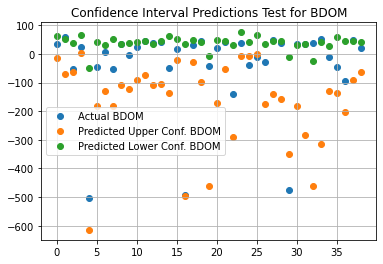

In [29]:
m = len(y_test)
#x_test_t0
#kvals
#x_test_bdom

    
# Fit models
lower_model.fit(x_train, y_train)
mid_model.fit(x_train, y_train)
upper_model.fit(x_train, y_train)
# Record actual values on test set
predictions_upper = upper_model.predict(x_test)
predictions_lower = lower_model.predict(x_test)
predictions_mid = mid_model.predict(x_test)

bdom_predictions_upper = np.zeros(m)
bdom_predictions_lower = np.zeros(m)
bdom_predictions_mid = np.zeros(m)
for k in range(0, m):
    bdom_predictions_upper[k] = bdom(x_test_t0[k], predictions_upper[k])
    bdom_predictions_lower[k] = bdom(x_test_t0[k], predictions_lower[k])
    bdom_predictions_mid[k] = bdom(x_test_t0[k], predictions_mid[k])


plt.scatter(kvals, x_test_bdom, label="Actual BDOM")
plt.scatter(kvals, bdom_predictions_upper, label="Predicted Upper Conf. BDOM")
plt.scatter(kvals, bdom_predictions_lower, label="Predicted Lower Conf. BDOM")
#plt.scatter(kval, bdom_predictions_mid, label="Predicted BDOM")
plt.grid()
plt.legend()
plt.title("Confidence Interval Predictions Test for BDOM")
plt.show()

<AxesSubplot:>

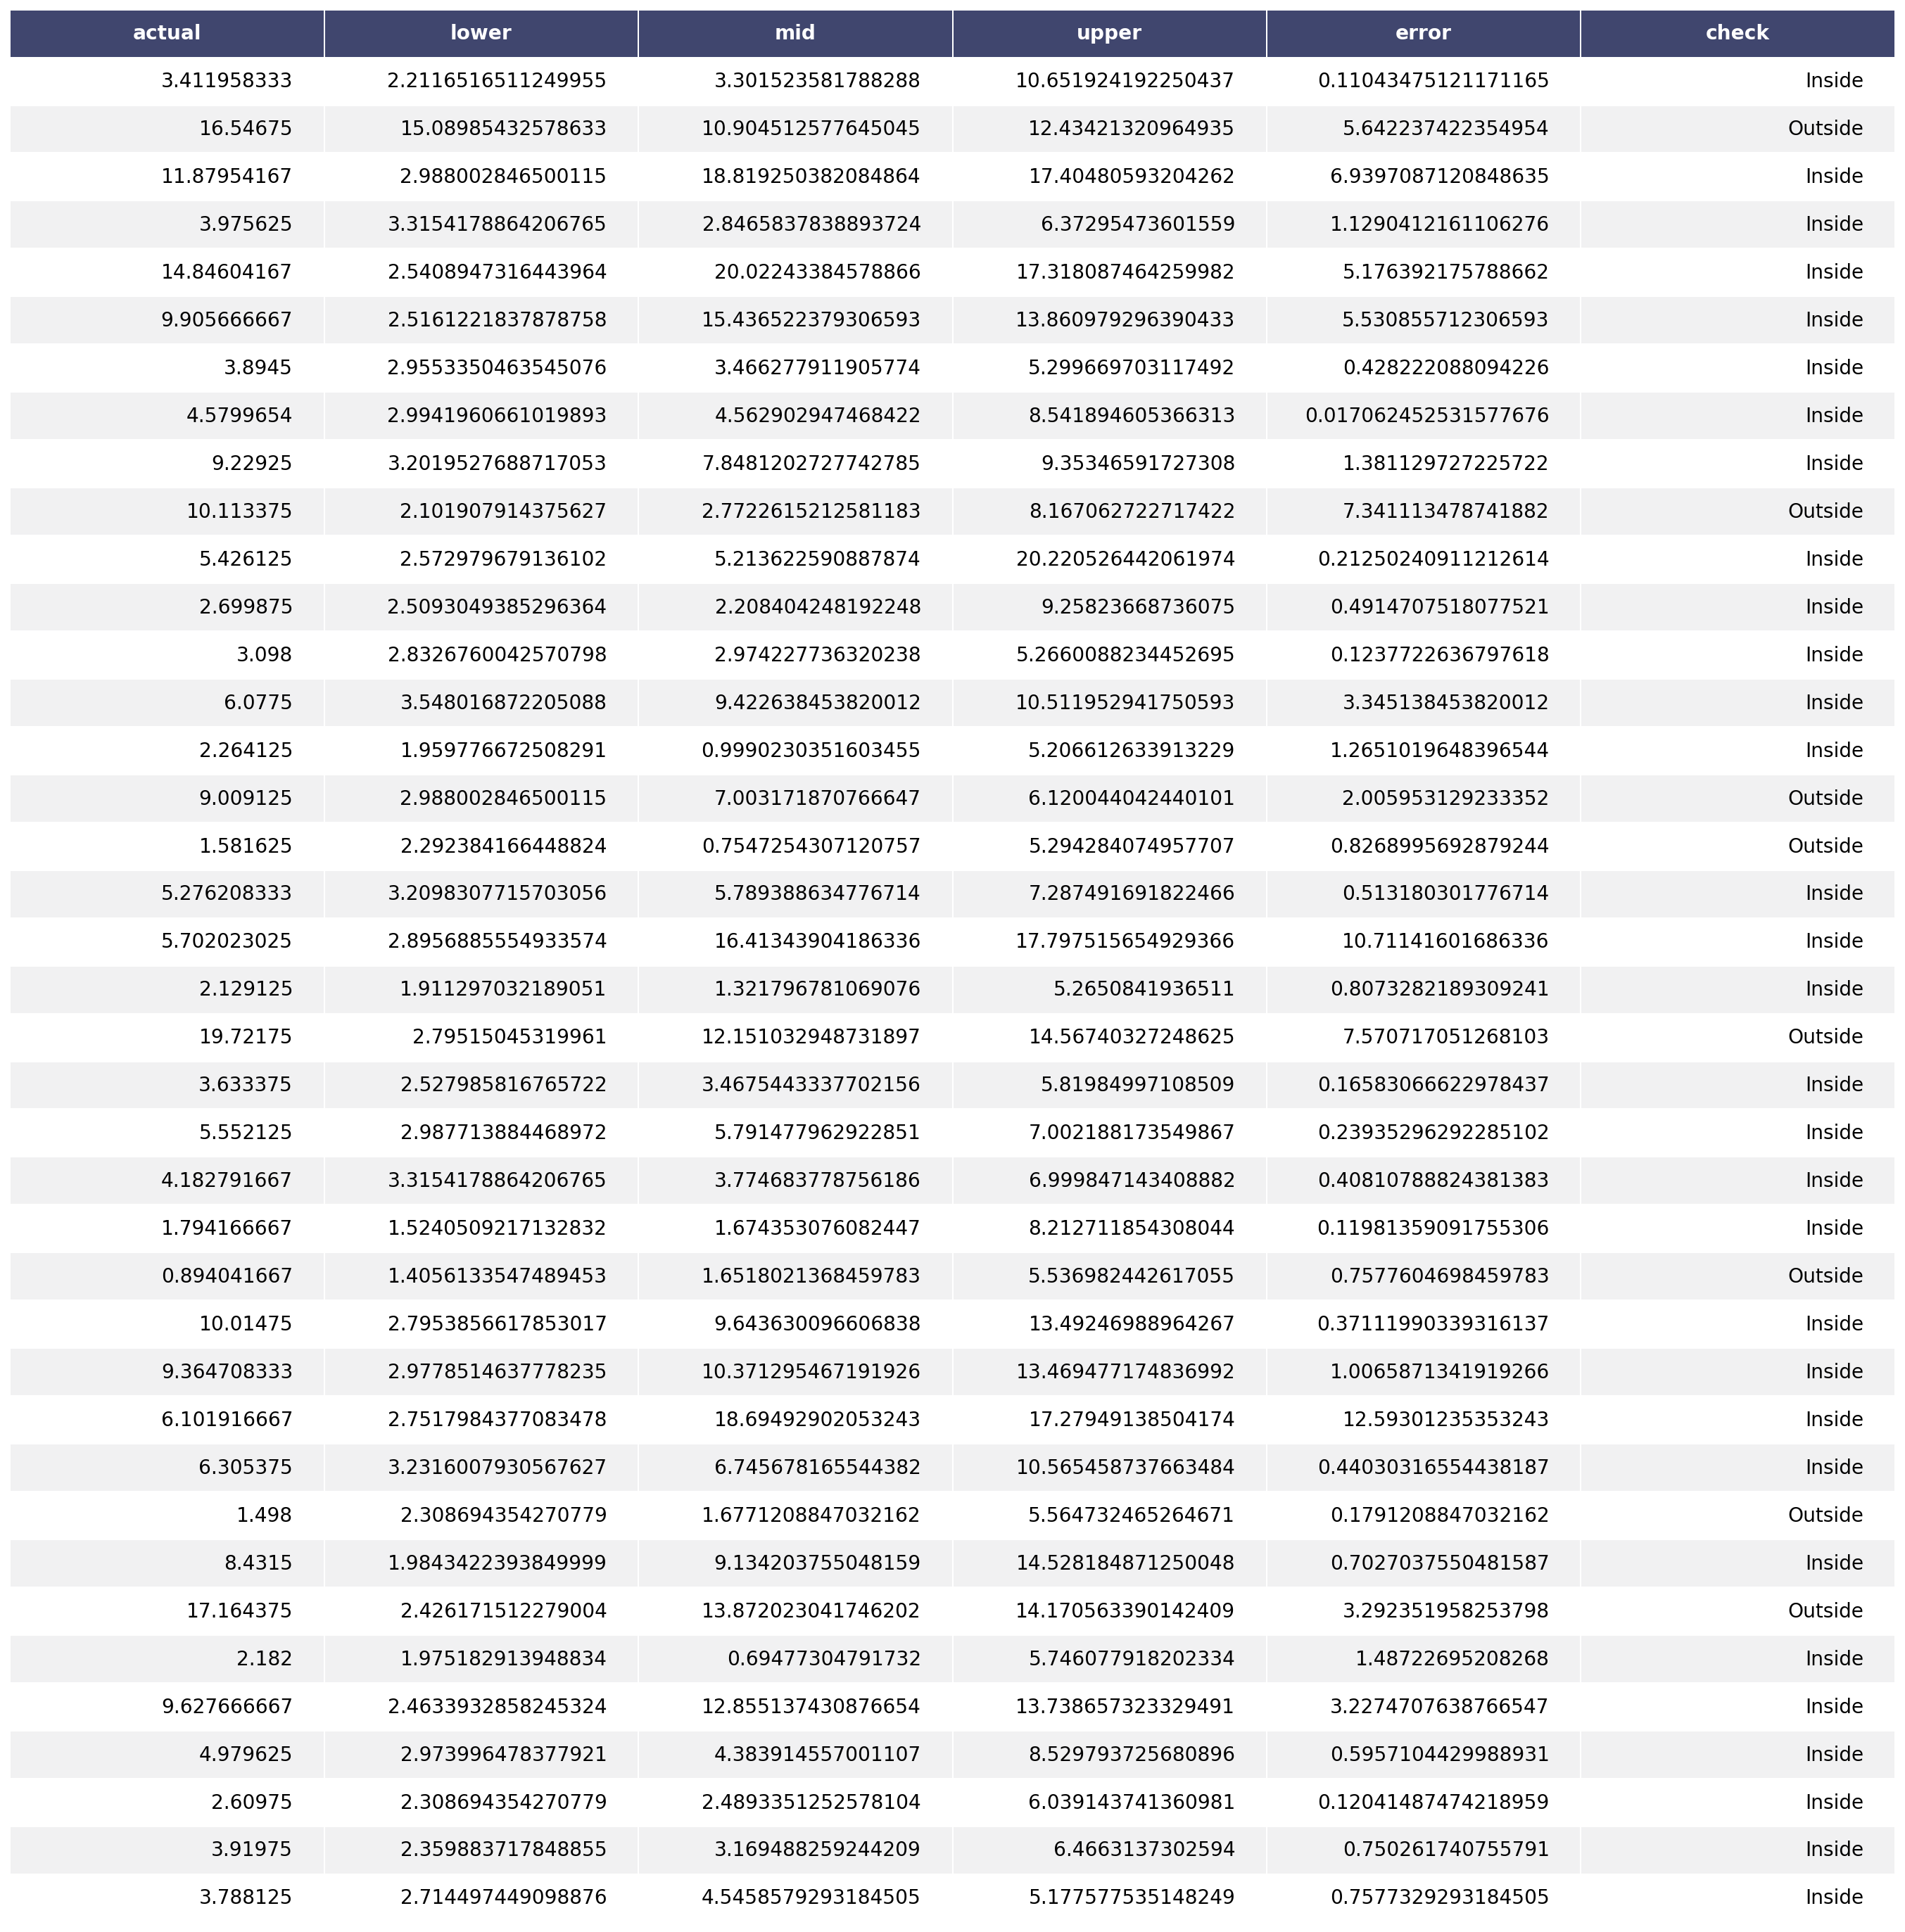

In [ ]:
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(predictions, header_columns=0, col_width=4.0)